# ML - Spring 2024 - Practical - 3

## Practical Homework 3 - Logistic Regression, Naive Bayes
Student Name:

Student Number:

In [1]:
%%capture
!pip install typing-extensions --upgrade
!pip install ydata-profiling

In [2]:
!wget -O /kaggle/working/hw3dataset.csv "https://www.dropbox.com/scl/fi/vs3b3rt3zof344bqq4rlb/hw3dataset.csv?rlkey=iuus9hv4rx73n99ks08tvyogc&dl=1"

--2024-05-03 20:02:25--  https://www.dropbox.com/scl/fi/vs3b3rt3zof344bqq4rlb/hw3dataset.csv?rlkey=iuus9hv4rx73n99ks08tvyogc&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf9fb0a430ae0fc372643abd4fd.dl.dropboxusercontent.com/cd/0/inline/CSNQ2DDdB9cKppptUwy8mDk4kR06jg8S0-x6NvbQpCGmMQQCwgJ1gxI5r3ZRKUj07ZDt6OS548CrSaPHwf7JuSDhbmsetRlLr7_UC0rT80JMlCCQhXf2urOVrmKojxVxRxHCEBPUMpKqy2FaDVHfWREI/file?dl=1# [following]
--2024-05-03 20:02:26--  https://ucf9fb0a430ae0fc372643abd4fd.dl.dropboxusercontent.com/cd/0/inline/CSNQ2DDdB9cKppptUwy8mDk4kR06jg8S0-x6NvbQpCGmMQQCwgJ1gxI5r3ZRKUj07ZDt6OS548CrSaPHwf7JuSDhbmsetRlLr7_UC0rT80JMlCCQhXf2urOVrmKojxVxRxHCEBPUMpKqy2FaDVHfWREI/file?dl=1
Resolving ucf9fb0a430ae0fc372643abd4fd.dl.dropboxusercontent.com (ucf9fb0a430ae0fc372643abd4fd.dl.dropboxusercontent.com)... 162

In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Phase 1: Explore (15 points)

Load the dataset as a dataframe. Then, check for any null values and remove the rows containing them. Finally. Also check for duplicate rows and delete them, if there are any. (p1-1: 3 points)

In [4]:
# Load the dataset
df = pd.read_csv('/kaggle/working/hw3dataset.csv')# FILL HERE

print("Null values:")
# Count (and print) number of null items in each column. then drop rows containing null values.
# FILL HERE
print('text       ',df["text"].isna().sum())
print('sentiment  ',df["sentiment"].isna().sum())
df = df.dropna(subset=["text","sentiment"])


print("------------------")
print("Duplicate rows:")
# Count (and print) number of duplicated rows. if it is non-zero, drop all duplicated rows.
# FILL HERE
print(df.duplicated().sum())
# Reset Index of the data frame
# FILL HERE
df = df.reset_index(drop=True)

Null values:
text        5
sentiment   4
------------------
Duplicate rows:
0


In [5]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


Plot the distribution of length of sentences in the dataframe(number of words in each sentence) (p1-2: 2 points)

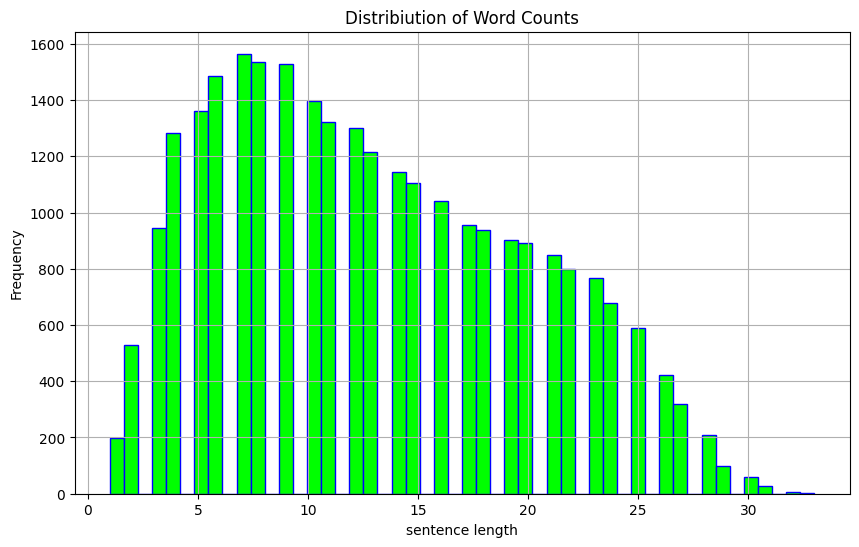

In [6]:
# Utilize `apply` function on the `text` column of the data frame to count number of tokens in each sentence.
word_count = df['text'].apply(lambda sentence: len(sentence.split()))# FILL HERE

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
# FILL HERE
plt.hist(word_count, bins=50, color='lime', edgecolor='blue')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
plt.ylabel("Frequency")
plt.xlabel("sentence length")
plt.title("Distribiution of Word Counts")
plt.grid()
plt.show()

Plot the distribution of sentiments (p1-3 2 points)

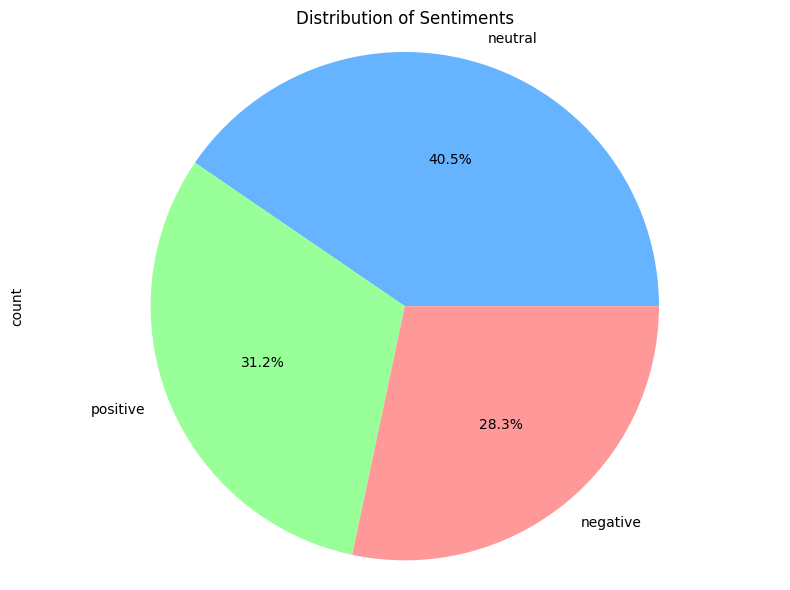

In [7]:
plt.figure(figsize=(8, 6))

# FILL HERE
# fig, ax = plt.subplots()
# ax.pie(df.sentiment.value_counts(), labels=df.sentiment.unique(), autopct='%1.1f%%')
colors = ['#66b3ff','#99ff99','#ff9999','#ffcc99']

counts = df['sentiment'].value_counts()
counts.plot.pie(autopct='%1.1f%%', labels=['neutral', 'positive', 'negative'],colors = colors)


plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

Plot 30 most frequent words. Instead of considering the complete form of the words
use the stemmed version of them. For more information on stemming [this](https://www.geeksforgeeks.org/introduction-to-stemming/) link.
Also ignore stopwords(i.e. most frequent words) in your plot use the [nltk](http://nltk.org) library stopwords collection.
Then do this for each set of positive, negative and neutral tweets separately (Each sentence in the dataset is a tweet) (p1-4 8 points)

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Store specified list of tweets into following variables
all_tweets = df.text.tolist()# FILL HERE
positive_tweets = df[df['sentiment'] == 'positive'].text.tolist()# FILL HERE
negative_tweets = df[df['sentiment'] == 'negative'].text.tolist()# FILL HERE
neutral_tweets = df[df['sentiment'] == 'neutral'].text.tolist()# FILL HERE

def plot_most_frequent_words(tweets, title):
    """
    This function is used to plot the frequent words along side with their frequency.
    Args:
        tweets: List of tweets.
        title: Title of the diagram
    """
    # Store list of english stop words (from nltk library) into the following variable
    stop_words = set(stopwords.words('english'))
    # Create an instance of PorterStemmer
    stemmer = PorterStemmer()
    
    # Store all non-stopword words into variable `all_words` after stemming.
    all_words = []
    for tweet in tweets:
        # Remove punctuation and other non-alphanumeric characters
        tweet_cleaned = re.sub(r'[^\w\s]', '', tweet)
        words = word_tokenize(tweet_cleaned)
        for word in words:
            if word.lower() not in stop_words:
                stemmed_word = stemmer.stem(word.lower())
                all_words.append(stemmed_word)
    
    # Count the frequency of each word
    word_freq = {}
    for word in all_words:
        word_freq[word] = word_freq.get(word, 0) + 1
    
    # Get the most common words and their frequencies
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    most_common_words = sorted_word_freq[:30]
    words, frequencies = zip(*most_common_words)
    
    # Now plot the diagram using a line plot
    plt.figure(figsize=(10, 8))
    plt.plot(words, frequencies, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


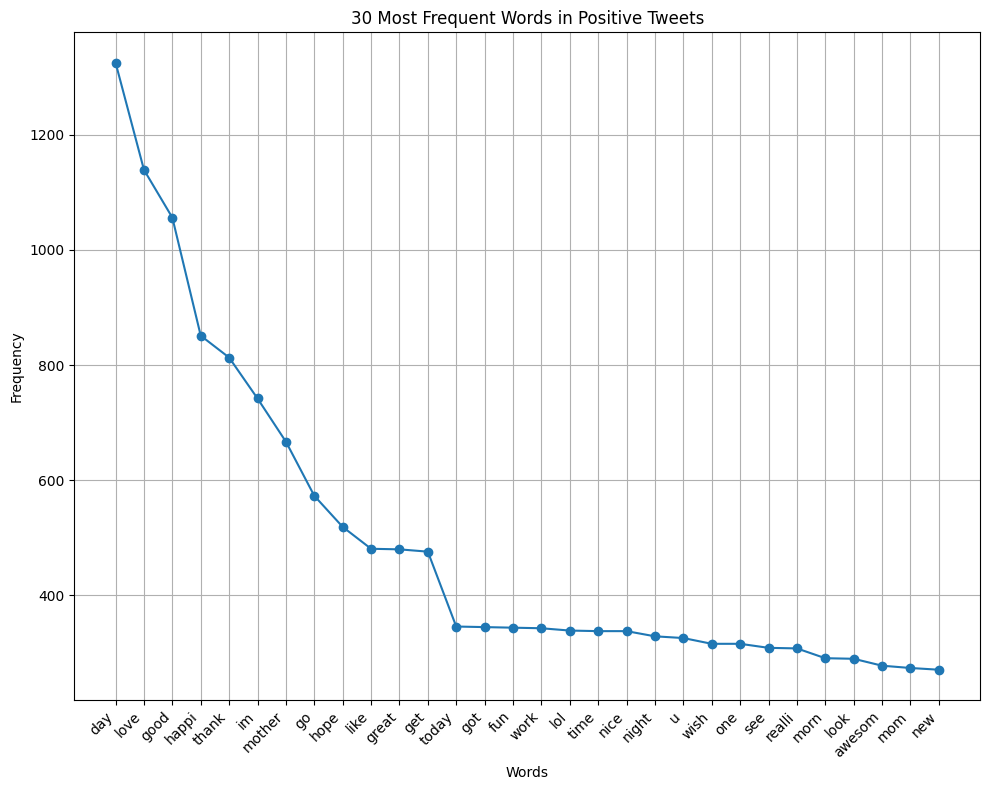

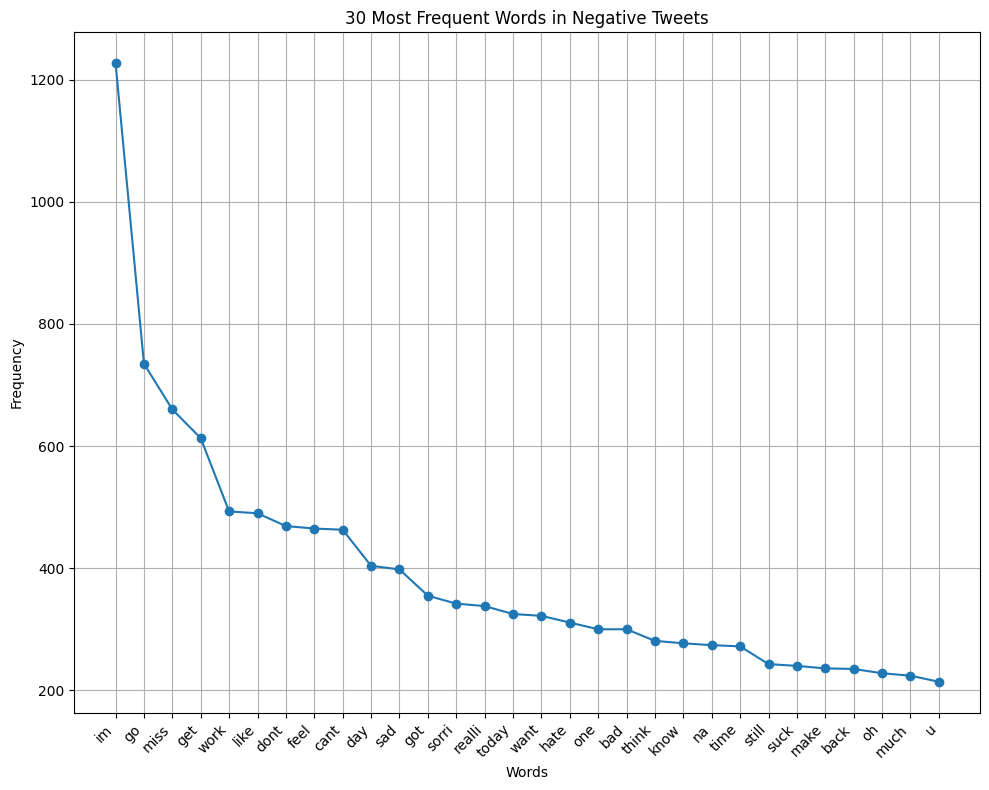

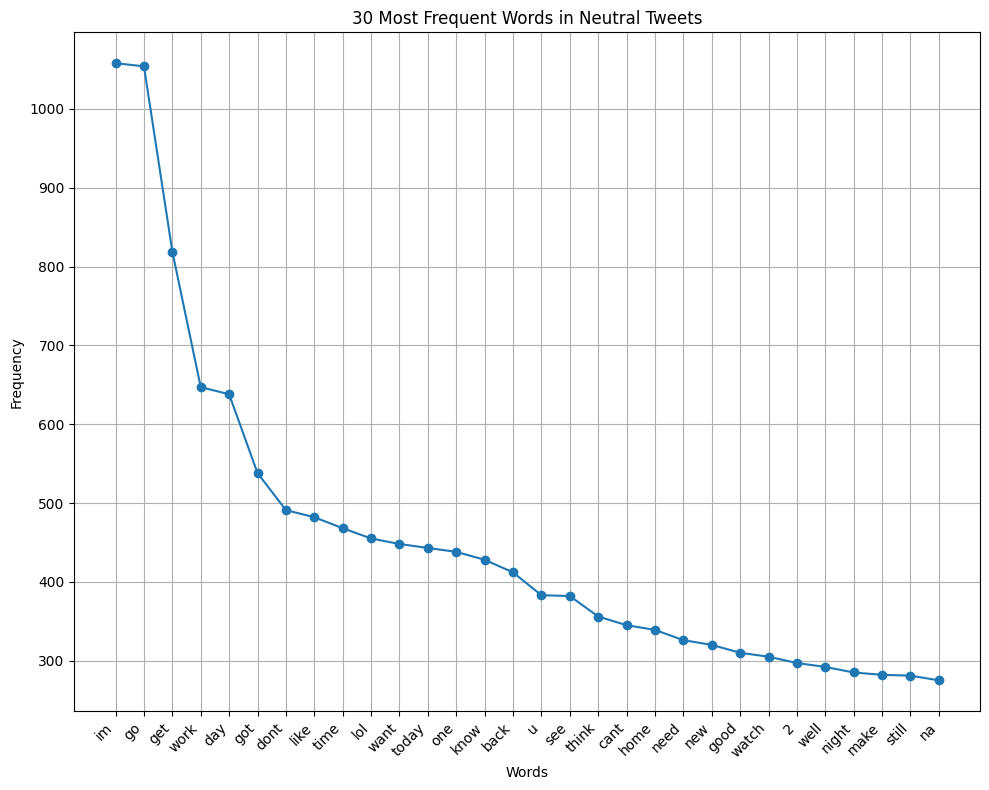

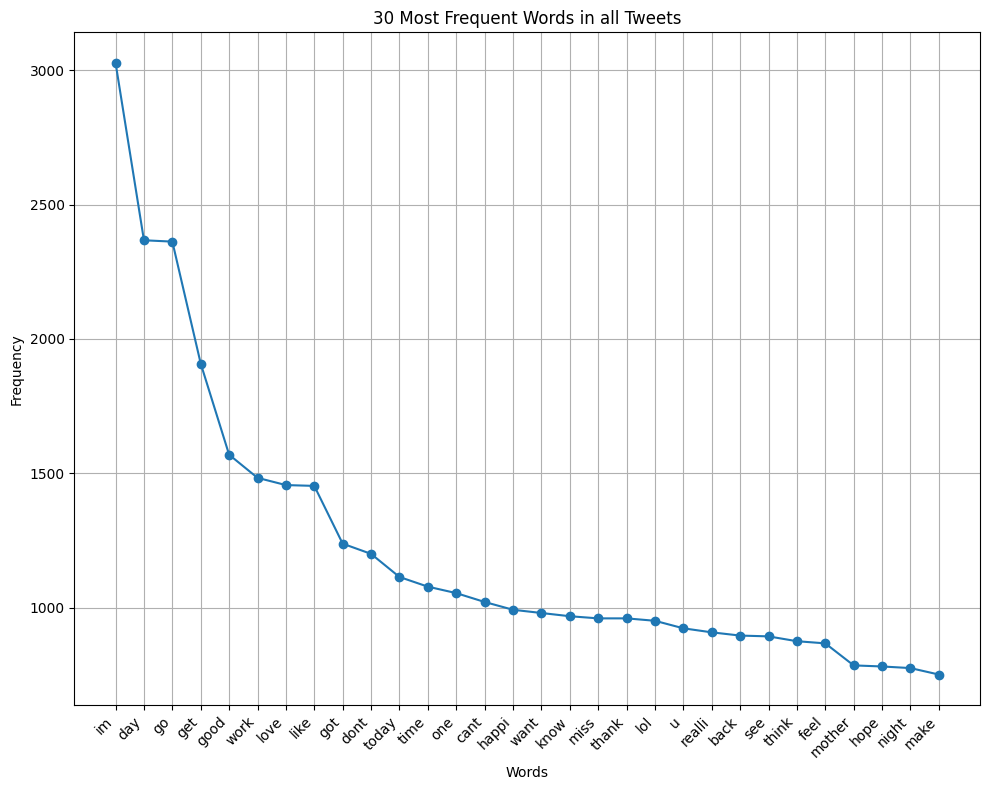

In [10]:
plot_most_frequent_words(positive_tweets, '30 Most Frequent Words in Positive Tweets')
plot_most_frequent_words(negative_tweets, '30 Most Frequent Words in Negative Tweets')
plot_most_frequent_words(neutral_tweets, '30 Most Frequent Words in Neutral Tweets')
plot_most_frequent_words(all_tweets, '30 Most Frequent Words in all Tweets')

# Phase 2: Preprocess(10 points)

Remove urls from tweets with regex. (Use pattern `r'https?://\S+|www\.\S+'`) (p2-1 3 points)

In [11]:
# Use `apply` function on the `text` column of the data frame to apply the aforementioned regex.
df['text'] = df.text.apply(lambda x : re.sub(r'https?://\S+|www\.\S+', ' ', x))

Remove everything except alphabetical and numerical characters (p2-2 2 points)

In [12]:
df['text'] = df.text.replace(r'[^\w\s]',' ',regex = True)# FILL HERE


In [13]:
df.head()

,text,sentiment
0,I d have responded if I were going,neutral
1,Sooo SAD I will miss you here in San Diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,Sons of why couldn t they put them on t...,negative


Lower all letters. Then use nltk and tokenize tweets. Then replace each word with its root and remove the stopwords. (p2-3 5 points)

In [14]:
# Initialize stemmer and stop_words from nltk
stemmer = PorterStemmer() # FILL HERE
stop_words = set(stopwords.words('english')) # FILL HERE
df_copy = df.copy()


# Convert all characters into lower case.
df['text'] = df['text'].str.lower() 
# Tokenize each tweet
df['text'] = df.text.apply(lambda x : word_tokenize(x))
# Drop stop words
df['text'] = df.text.apply(lambda word_list : [word for word in word_list if word not in stop_words])

# Stem remaining words
df['text'] = df.text.apply(lambda listt : list(stemmer.stem(word) for word in listt))

# Store the resulting string back into the `text` column of the data frame
df['text'] = df.text.apply(lambda listt : ' '.join(listt))
          
# FILL HERE
# FILL HERE
# FILL HERE
# df['text'] = df.text.apply(lambda sentence: ' '.join([stemmer.stem(word) for word in sentence.split() if stemmer.stem(word) not in stop_words]))

In [15]:
df.head()

,text,sentiment
0,respond go,neutral
1,sooo sad miss san diego,negative
2,boss bulli,negative
3,interview leav alon,negative
4,son put releas alreadi bought,negative


# Phase 3: Prepare Data for Training! (20 points)

We don't need neutral labels So Delete them from the dataset. Also, make sure there are not any unknown or Nan values at this stage. (p3-1 3 points)

In [16]:
# Drop rows containing null value
df = df.dropna(subset=["text", 'sentiment']) # FILL HERE

# Drop rows with `neutral` sentiment
df = df[df['sentiment'] != 'neutral'] # FILL HERE

In [17]:
print(df['sentiment'].value_counts())
df.head()

sentiment
positive    8579
negative    7779
Name: count, dtype: int64


,text,sentiment
1,sooo sad miss san diego,negative
2,boss bulli,negative
3,interview leav alon,negative
4,son put releas alreadi bought,negative
6,2am feed babi fun smile coo,positive


Convert sentiments to numerical labels. (p3-2 3 points)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment']) # FILL HERE

In [19]:
df.head()

,text,sentiment
1,sooo sad miss san diego,0
2,boss bulli,0
3,interview leav alon,0
4,son put releas alreadi bought,0
6,2am feed babi fun smile coo,1


Now determine X and y and split training, validation, and test data. Results should be numpy arrays. (p3-3 4 points)

In [20]:
from sklearn.model_selection import train_test_split

X = df['text'].values # FILL HERE
y = df['sentiment'].values # FILL HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1382)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11111, random_state=1382)

Do a vectorization on the data(using tf-idf or count-vectorizer). This is like feature extraction, you can use countvectorizer. (there is no need to include all words as features. you can set max features around C for ease of implementation) (p3-4 10 points)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def vectorize_data(vectorization_type, max_features, X_train, X_val, X_test):
    """
    This function gets training, validation and test data sets and vectorize all the data sets using the specified vectorization technique.
    Args:
        vectorization_type: Vectorization type ("count-vectorizer" or "tfidf-vectorizer")
        max_features: Will be passed directly into the Vectorizer.
        X_train: Training data set.
        X_val: Validation data set.
        X_test: Test data set.

    Returns:
        Vectorized X_train, X_val, X_test
    """
    if vectorization_type=='count-vectorizer':
        vectorizer = CountVectorizer(max_features=max_features)
    elif vectorization_type=='tfidf-vectorizer':
        vectorizer = TfidfVectorizer(max_features=max_features)

    X_train_vectorized = vectorizer.fit_transform(X_train) # FILL HERE
    X_val_vectorized = vectorizer.transform(X_val) # FILL HERE
    X_test_vectorized = vectorizer.transform(X_test) # FILL HERE


    
    
    return X_train_vectorized.toarray(), X_val_vectorized.toarray(), X_test_vectorized.toarray()

X_train_vectorized, X_val_vectorized, X_test_vectorized = vectorize_data('count-vectorizer', 1000, X_train, X_val, X_test)
print(X_train_vectorized.shape, X_val_vectorized.shape, X_test_vectorized.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(13086, 1000) (1636, 1000) (1636, 1000)
(13086,) (1636,) (1636,)


# Train Your Model! (40 points)

Implement Logistic Regression from scratch. (p4-1 15 points)

In [22]:
import warnings

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

class LogisticRegressionS(BaseEstimator, ClassifierMixin):

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    # compute logits
    def semi_pred(self, X):
        return np.dot(X, self.weights) + self.bias
    
    # implement sigmoid function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # compute the loss
    def loss(self, X, y):
        m = X.shape[0]
        logits = self.semi_pred(X)
        predictions = self.sigmoid(logits)
        loss = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss

    # compute the gradients and return them
    def loss_backward(self, X, y):
        m = X.shape[0]
        logits = self.semi_pred(X)
        predictions = self.sigmoid(logits)
        dz = predictions - y
        dw = 1/m * np.dot(X.T, dz)
        db = 1/m * np.sum(dz)
        return dw, db

    # apply gradient descent for num_iterations iterations using the functions defined above
    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            dw, db = self.loss_backward(X, y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # compute predictions
    def predict(self, X):
        logits = self.semi_pred(X)
        predictions = self.sigmoid(logits)
        return np.round(predictions)


Train the model and find the best parameters using sklearn gridsearch and count vectorizer. We are gonna compare your models in the next section! (p4-2 10 points)

In [23]:
from sklearn.model_selection import GridSearchCV


param_grid = {'learning_rate': [1, 0.1, 0.01]}

# Initialize an instance of your model
LRS_model = LogisticRegressionS()

# Create an instance of GridSearchCV.
grid_search = GridSearchCV(LRS_model, param_grid, cv=3)

# Fit the instance of GridSearchCV on training data
grid_search.fit(X_train_vectorized, y_train)

GridSearchCV(cv=3, estimator=LogisticRegressionS(),
             param_grid={'learning_rate': [1, 0.1, 0.01]})

Now define sklearn LogisticRegression model and fit the model on training data (p4-3 5 points)

In [24]:
from sklearn.linear_model import LogisticRegression

LRSK_model = LogisticRegression(max_iter=1000)
LRSK_model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

Report sklearn and your results on validation set (p4-4 5 points)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = grid_search.predict(X_val_vectorized) # FILL HERE
LRS_res = accuracy_score(y_val, predictions) # FILL HERE

y_pred = LRSK_model.predict(X_val_vectorized) # FILL HERE (predicting using the trained model)
LRSK_res = accuracy_score(y_val, y_pred) # FILL HERE (computing accuracy)

print('Sklearn Logistic Regression:', LRSK_res)
print('Custom Logistic Regression:', LRS_res)

Sklearn Logistic Regression: 0.8685819070904646
Custom Logistic Regression: 0.8740831295843521


Does using tf-idf as count vectorizer improve the performance? Why? (p4-4 5 points)

Using TF-IDF (Term Frequency-Inverse Document Frequency) as a count vectorizer can potentially improve the performance of certain text classification tasks compared to using a simple CountVectorizer. Here's why:

-Term Frequency (TF): TF measures how frequently a term occurs in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in the document. TF gives importance to terms that occur frequently within a document.

-Inverse Document Frequency (IDF): IDF measures the importance of a term in the entire corpus. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term. IDF gives less weight to terms that occur frequently across all documents in the corpus.
When you use TF-IDF vectorization, you essentially weigh the importance of each term in a document based on both its frequency within that document (TF) and its rarity across all documents (IDF). This weighting scheme helps in:

Reducing the Impact of Common Terms: Words like "the", "and", "is", etc., which occur frequently in almost all documents, can dominate the feature space when using simple term frequency counts. IDF helps in reducing the importance of such common terms.

Highlighting Discriminative Terms: Terms that are frequent in a particular document but rare across other documents can be indicative of the document's content. TF-IDF gives more weight to such terms, making them more influential in the classification process.

Handling Long Documents: In longer documents, the raw frequency of terms might be higher simply due to the document's length. TF-IDF normalizes the term frequencies, making them comparable across documents of varying lengths.

In [26]:
X_train_vectorized, X_val_vectorized, X_test_vectorized = vectorize_data('tfidf-vectorizer', 1000, X_train, X_val, X_test) # FILL HERE

# Fit logistic regression with grid search on your model
param_grid = {'learning_rate': [1, 0.1, 0.01]}
LRS_model = LogisticRegressionS()# FILL HERE
grid_search = GridSearchCV(LRS_model, param_grid, cv=3) # FILL HERE
grid_search.fit(X_train_vectorized, y_train) # FILL HERE

# Fit sklearn logistic regression on your model
LRSK_model = LogisticRegression(max_iter=1000) # FILL HERE
LRSK_model.fit(X_train_vectorized, y_train) # FILL HERE

# Compute accuracy of your model with grid search
predictions = grid_search.predict(X_val_vectorized) # FILL HERE
LRS_res = accuracy_score(y_val, predictions) # FILL HERE

# Compute accuracy of sklearn logisitc regression
y_pred = LRSK_model.predict(X_val_vectorized) # FILL HERE (predicting using the trained model)
LRSK_res = accuracy_score(y_val, y_pred) # FILL HERE (computing accuracy)

print('Sklearn Logistic Regression:', LRSK_res)
print('Custom Logistic Regression:', LRS_res)

Sklearn Logistic Regression: 0.8722493887530562
Custom Logistic Regression: 0.8624694376528117


Train your custom naive bayes model. Select the best smoothing parameter using validation set. (p4-5 10 points)

In [27]:
class NaiveBayesS:
    def __init__(self, alpha=1):
        '''
        Initialize Laplace smoothing parameter
        '''
        self.alpha = alpha
        self.class_probs = np.zeros(2)
        self.word_probs = {0: None, 1: None}

    def fit(self, X, y):
        '''
        Calculate class probabilities P(Y) and word probabilities P(X_i | Y)
        '''
        num_samples, num_features = X.shape

        # Count occurrences of each class
        self.class_probs[1] = np.sum(y)
        self.class_probs[0] = num_samples - self.class_probs[1]

        # Laplace smoothing for class probabilities
        self.class_probs = (self.class_probs + self.alpha) / (num_samples + 2 * self.alpha)

        # Count occurrences of words for each class
        self.word_probs[0] = ((1 + self.alpha) / (num_features + self.alpha)) * np.ones(num_features)
        self.word_probs[1] = ((1 + self.alpha) / (num_features + self.alpha)) * np.ones(num_features)

        for i in range(num_samples):
            for j in range(num_features):
                self.word_probs[y[i]][j] += X[i][j]

        total_word_count_0 = self.word_probs[0].sum()
        total_word_count_1 = self.word_probs[1].sum()

        self.word_probs[0] /= (total_word_count_0 + num_features * self.alpha)
        self.word_probs[1] /= (total_word_count_1 + num_features * self.alpha)

    def predict(self, X):
        '''
        Predict the class with the highest score
        '''
        num_samples, _ = X.shape
        predictions = np.zeros(num_samples)

        for i in range(num_samples):
            scores = np.log(self.class_probs)
            nonzero_indices = np.nonzero(X[i])[0]
            for label in [0, 1]:
                scores[label] += np.log(self.word_probs[label][nonzero_indices]).sum()
            predictions[i] = np.argmax(scores)

        return predictions.astype(int)

In [28]:
# Vectorize your data with count-vectorizer
X_train_vectorized, X_val_vectorized, X_test_vectorized = vectorize_data('count-vectorizer', 1000, X_train, X_val, X_test) # FILL HERE

In [29]:
# Fit your naive bayes model
NBS_model = NaiveBayesS()# FILL HERE
NBS_model.fit(X_train_vectorized, y_train)# FILL HERE

Train sklearn naive bayes (p4-6 5 points)

In [30]:
from sklearn.naive_bayes import MultinomialNB

NBSK_model =MultinomialNB() # FILL HERE
NBSK_model.fit(X_train_vectorized, y_train) # FILL HERE

MultinomialNB()

Compare sklearn and you naive bayes perfromance on validation set (p4-7 5 points)

In [31]:
# Compute accuracy of your naive bayes model
predictions = NBS_model.predict(X_val_vectorized) # FILL HERE
NBS_res = accuracy_score(y_val, predictions) # FILL HERE

# Compute accuracy of sklearn naive bayes model
y_pred = NBSK_model.predict(X_val_vectorized) # FILL HERE
NBSK_res = accuracy_score(y_val, y_pred) # FILL HERE

print('Sklearn Naive Bayes:', NBSK_res)
print('Custom Naive Bayes:', NBS_res)

Sklearn Naive Bayes: 0.8612469437652812
Custom Naive Bayes: 0.8612469437652812


# Final Results

Compare your models and sklearn models performance on Test set (p4-8 5 points)

In [32]:
# compute accuray of sklearn naive bayes model
y_pred = NBSK_model.predict(X_test_vectorized)
NBS_res = accuracy_score(y_test, y_pred)

# compute accuracy of your naive bayes model
predictions = NBS_model.predict(X_test_vectorized)
NBS_res = accuracy_score(y_test, predictions)

# compute accuracy of your logisitc regression model using grid search
predictions = grid_search.predict(X_test_vectorized)
LRS_res = accuracy_score(y_test, predictions)

# compute accuracy of sklearn logistic regression model
y_pred = LRSK_model.predict(X_test_vectorized)
LRSK_res = accuracy_score(y_test, y_pred)

print('sklearn Naive Bayes:', NBSK_res)
print('sklearn Logistic Regression:', LRSK_res)
print('custom Naive Bayes:', NBS_res)
print('custom Logistic Regression:', LRS_res)

sklearn Naive Bayes: 0.8612469437652812
sklearn Logistic Regression: 0.8594132029339854
custom Naive Bayes: 0.8551344743276283
custom Logistic Regression: 0.8380195599022005
